# Introduction to Bayesian Learning
Author: Volker Krueger

## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image



samples_per_class = 500
number_of_classes = 10

filelist = sorted(glob.glob('./data/*/*.png'))
x = np.array([np.array(Image.open(fname)) for fname in filelist])

y = np.zeros(number_of_classes * samples_per_class,dtype=int)
for cls in range(1,number_of_classes):
    y[(cls*500):(cls+1)*500] = cls   



## Visualizing the Dataset

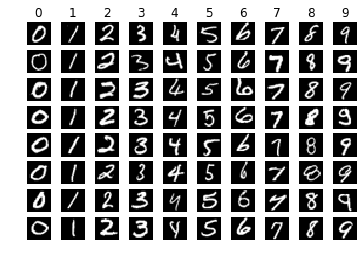

In [2]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()

## Mean

compute the mean of each class and display

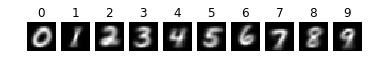

In [3]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    mean_of_class[cls]=np.mean(x[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()


## Generate Training and Testing data, and visualize

In [4]:
#######################################################################
# x_train will contain the training data
# y_train will contain the correct classes of the training data
# x_test will contain the test data
# y_test will contain the correct classes for the test data
#######################################################################
x_train=np.zeros((4000,20,20))
y_train=np.zeros(4000)
x_test =np.zeros((1000,20,20))
y_test =np.zeros(1000)

for cls in range(number_of_classes):
    idx=cls*400
    idx1=cls*500
    idx2=cls*100
    x_train[idx:idx+400,:,:]=x[idx1:idx1+400,:,:]
    y_train[idx:idx+400]=y[idx1:idx1+400]
    x_test[idx2:idx2+100,:,:]=x[idx1+400:idx1+500,:,:]
    y_test[idx2:idx2+100]=y[idx1+400:idx1+500]
    


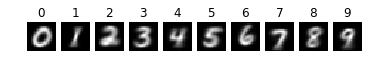

In [5]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    mean_of_class[cls]=np.mean(x_train[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

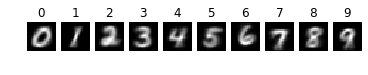

In [6]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_test == cls)[0]
    mean_of_class[cls]=np.mean(x_test[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

## put your code for the naive Bayesian classifier here

In [7]:
from scipy.stats import multivariate_normal as mvn


#input: x_test
#output: y_test_pred
class NaiveBayesian():
    def fit(self, x_train, y_train, smoothing=1300):
        self.num_cls = len(np.unique(y_train)) # number of classes is the unique number of Y values
        self.mean = np.zeros((self.num_cls, 400))
        self.var  = np.zeros((self.num_cls, 400))

		# For each class, compute mean and variance:
        for cls in range(self.num_cls):
            idxs = np.where(y_train == cls)[0]
            self.mean[cls] = np.mean(x_train[idxs], axis=0)
            self.var [cls] = np.var (x_train[idxs], axis=0) + smoothing
        
    def predict(self, x_test):
        num = len(x_test)
        y = np.zeros((num))

		# For each input sample:
        for xi in range(num):
            cp = np.zeros((self.num_cls))
			# For each class, compute the probability of the class giving this input:
            for c in range(len(cp)):
				# Use multivariate normal distribution distribution function:
				# (logarithm because direct multiplication of probabilities loses numerical precision faster)
                cp[c] = mvn.logpdf(x_test[xi], mean=self.mean[c], cov=self.var[c])
            y[xi] = np.argmax(cp) # predict most probably class
        return y

## now lets run your code and evaluate your accuracy

In [12]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
# Evaluate your classifier on the test set
print(x_train.shape)
print(x_train.reshape(-1,400).shape)
x_train_r = x_train.reshape(-1, 400)
x_test_r = x_test.reshape(-1, 400)
y_test_r = y_test
#model = GaussianNB()
NBC_model = NaiveBayesian()
NCC_model = NearestCentroid(metric='euclidean', shrink_threshold=None)

NBC_model.fit(x_train_r, y_train)
NCC_model.fit(x_train_r, y_train)

num = len(x_test_r)
#num = 100 # - testing with smaller size
x_test_r = x_test_r[0:num]
y_test_r = y_test_r[0:num]

NBC_y_test_pred = NBC_model.predict(x_test_r)
NCC_y_test_pred = NCC_model.predict(x_test_r)

NBC_test_accuracy = np.mean(y_test_r == NBC_y_test_pred)
NCC_test_accuracy = np.mean(y_test_r == NCC_y_test_pred)
print(NBC_test_accuracy, NCC_test_accuracy)


(4000, 20, 20)
(4000, 400)
0.797 0.796


## Let's visualize some of the wrongly classified test samples.

misclassifications for class 0: 0.012
misclassifications for class 1: 0.033
misclassifications for class 2: 0.006
misclassifications for class 3: 0.015
misclassifications for class 4: 0.022
misclassifications for class 5: 0.009
misclassifications for class 6: 0.021
misclassifications for class 7: 0.007
misclassifications for class 8: 0.029
misclassifications for class 9: 0.049


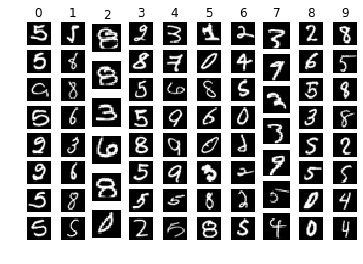

In [11]:
for cls in range(number_of_classes):
    examples_per_class = 8
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    print(f'misclassifications for class {cls}: {len(idxs)/len(y_test == cls)}')
    while True:
        try:
            idxs = np.random.choice(idxs, examples_per_class, replace=False)
        except ValueError:
            examples_per_class -= 1
            continue
        break
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()